In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
#DB, USER ID, FOLLOWERS COUNT, 

In [3]:
data = pd.read_csv('allbrands_users_captions_list.csv')
data = data[data['followers_count']>10000]
data = data[data['followers_count']<100000]

In [15]:
list_users = ['ana_brandine', 'vicky_regouli', 'luismiguelpss', 'ilariabiagini', 
              'emnegg', 'kerendhahn', 'agiorgina', 'roulamatta', 'jussbieber9827', 
              'eremiaheidr', 'eunhuiheo', 'anastasiakaps', 'achaelilsone', 'orit_talbi',
              'sorayaalassmi', 'altonolnlis', 'vaso1977', 'theunrealobserver', 'nsb.koc',
              'vivpeng', 'amrynevillek', 'danalev7', 'irienyree', 'lilachturgeman', 
              'emel_karakoc', 'thiswhomustbekept', 'j_f_lil', 'ulietteearneye', 
              'gilanaz', 'sarrahdolly', 'alexchahine97', 'photographerarson', 
              'angecanindo', 'fiona_smithson', 'chelsea_xu620']
for i,v in enumerate(data.username): 
    for j, k in enumerate(list_users):
        if str(v) == list_users[j]:
            print(v)
            
    #### Note to Karan: 
    ### we need to pick our users. They don't match

## dataframe created at end of doc

In [4]:
dftest = (data.sample(n=50)).reset_index()
dftest

,index,Unnamed: 0,username,followers_count,caption
0,38,38,_mayanas_,10896,['online shop: www.mayanas.eu❤️#bracelet#fashi...
1,24,24,bodvarrose,31907,"['No tricks, just treats #BodvárRosé #RoséThis..."
2,108,108,airamtoribio,98811,['El regreso del espejo 😂😂😂 Hoy cómoda para un...
3,83,83,___elysium___it,10267,['А ты уже готова к зиме?🐇 Если нет - не упуск...
4,97,97,aesthetic_mikes,51413,['You can’t help but feel bad for little homie...
5,15,15,_joice_fernanda_,10491,['Pantacourt sempre elegante e ainda mais na c...
6,107,107,agichristine,15825,['M O N D A Y S .\r\r\n.\r\r\n.\r\r\n.\r\r\n.\...
7,136,136,_nina_pol,11362,['Ωραία γυναίκα είναι αυτή που η γοητεία της ε...
8,72,72,alessandrafioriniphotography,52195,['Sunkissed Brandy ☀️ @brandygordon098 \r\nBy ...
9,146,146,am_stef,12749,"['M O N D A Y', 'let’s go somewhere where the ..."


In [5]:
# drop the ones that don't use english!

dftest = dftest.drop([3, 7, 17, 47])
# save to csv 
dftest.to_csv('usersused.csv', sep=',')

In [72]:
#Saturday

userlist=[]
emojis = []
usernameforeachpost  = []
f2post = []
f3post = []

captionsfromsample = dftest.caption
captionsfromsample = (pd.DataFrame(captionsfromsample)).reset_index()
captionsfromsample.drop(['index'], axis =1, inplace = True)

listof = []
for num, singlepost in enumerate(captionsfromsample.caption): 
    ## f1 separates by user. This is each user's total supply of posts
    f1 = singlepost.split("\', \'")

    # take only the first quarter of their text
    quarter= (len(f1)/4)
    f1 = f1[0:int(quarter)]

    f3 = []
    
    for j,k in enumerate(f1):


        f2 = (f1[j].replace("\n", " ")).replace("\\", "")
        emoji = re.findall(r'[^\w\s,]', f2)
        emojis.append(emoji)
        f3.append(f2)
        #usernameforeachpost.append(dftest.username[num])
        f2post.append(f2)
        f3post.append(f3)
        
print(len(f2), len(f2post), len(f3post), len(emojis), len(usernameforeachpost))
#df1991 = pd.DataFrame({'caption': f3post, 'username': usernameforeachpost}) 

20 2457 2457 2457 0


In [73]:
df1991 = pd.DataFrame({'caption': f2post, 'emojis': emojis,})  

In [74]:
df1991

,caption,emojis
0,['online shop: www.mayanas.eu❤️#bracelet#fashi...,"[[, ', :, ., ., ❤, ️, #, #, #, #, #, #, #, #, ..."
1,one day on the riverside❤️ #rivwr#riverside#dr...,"[❤, ️, #, #, #, #, #, #, #, #, #, #, #, #, #, ..."
2,beautiful @_dinad_ in our summer 2017 campaig...,"[@, ❤, ️, ❤, ️, ❤, ️, ., ., ❤, ️, #, #, #, #, ..."
3,photo credit: @crisgrantphoto #beach #bracelet...,"[:, @, #, #, #, #, #, #, #, #, #, #, #, #, #, ..."
4,sunrise at our island❤️ photo: @goranmehanovic...,"[❤, ️, :, @, #, #, #, #, #, #, #, #, #, #, #, ..."
5,beautiful @_dinad_ rocks her mayanas bracelets...,"[@, ❤, ️, :, ., ., ❤, ️, #, #, #, #, #, #, #, ..."
6,online shop: www.mayanas.eu❤️#bracelet#fashion...,"[:, ., ., ❤, ️, #, #, #, #, #, #, #, #, #, #, ..."
7,online shop: www.mayanas.eu❤️#bracelet#fashion...,"[:, ., ., ❤, ️, #, #, #, #, #, #, #, #, #, #, ..."
8,online shop: www.mayanas.eu❤️#bracelet#fashion...,"[:, ., ., ❤, ️, #, #, #, #, #, #, #, #, #, #, ..."
9,online shop: www.mayanas.eu❤️#bracelet#fashion...,"[:, ., ., ❤, ️, #, #, #, #, #, #, #, #, #, #, ..."


This is working!

In [75]:
df1991['polarity'] = np.zeros(len(df1991.caption))
vectorizer = CountVectorizer(stop_words=['and', 'or', 'before', 'a', 'an', 'the']) #min_df=4
corpus = df1991['caption'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = df1991['polarity'].values

## it outputs words
## each line, token column


In [76]:
#vectorizer.vocabulary_
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [79]:

listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,10):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  



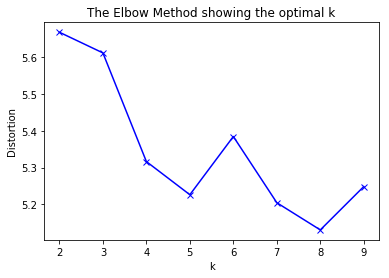

In [80]:
plt.plot(range(2,10), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [93]:
fours = DFclusters[DFclusters.K_askedfor ==6]


In [94]:
fours.listofwordspercluster

14    [rrn, agnesfischer, to, ice_models_germany, ic...
15    [rn, to, in, lipstick, for, you, by, makeup, i...
16    [to, of, we, http, it, in, apotthegreatgiveawa...
17    [to, of, we, it, in, http, you, giveaway, this...
18    [rn, mensfashion, menstyle, menslook, menwithc...
19    [rn, to, in, of, for, de, with, this, you, our...
Name: listofwordspercluster, dtype: object

In [45]:
cluster = (DFclusters.listofwordspercluster[2:5])
cluster[4]

['rrn',
 'to',
 'of',
 'agnesfischer',
 'in',
 'modellinkagency',
 'ice_models_germany',
 'icemodelscpt',
 'with',
 'for',
 'majormodelsmilan',
 'lemanagement',
 'visagemodelsaustria',
 'vidamodels',
 'aquamodelmanagement',
 'you',
 'we',
 'your',
 'reebokwomen',
 'reebok',
 'notoysmodels',
 'are',
 'our',
 'on',
 'be',
 'at',
 'is',
 'style',
 'fitgirl',
 'fitspo',
 'will',
 'this',
 'fitgirlsworldwide',
 'from',
 'photo',
 'fitgirlsguide',
 'magazin',
 'fitforfun',
 'reebokgermany',
 'shopsmall',
 'it',
 'stretch',
 'houstonboutique',
 'shoplocal',
 'loveabejasrrn',
 'mycity',
 'jelmoli_sports',
 'agichristinerb',
 'engelhornsportswomen',
 'fashion',
 'houstonfashion',
 'freistil_sportmodels',
 'not',
 'model',
 'sportscheckwomen',
 'sportsgirl',
 'jelmoli',
 'weekendvibes',
 'happy',
 'bid',
 'bemorehuman',
 'reeboknordics',
 'agichristineyoga',
 'sportbittl',
 'abejaspins',
 'alohacollection',
 'that',
 'yoga',
 'all',
 'ootd',
 'instastyle',
 'weekendstyle',
 'stylegram',
 'street

In [12]:
""""listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []

for i in range(2,8):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFofall = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  """"

In [31]:
DFclusters

,K_askedfor,clusternumber,listofwordspercluster
0,2,1,"[rrn, de, in, to, shop, rn, com, of, fashion, ..."
1,2,2,"[rn, de, que, da, em, com, do, as, um, marketi..."
2,3,1,"[rn, de, shop, com, in, fashion, fashionblogge..."
3,3,2,"[rrn, to, houstonboutique, shoplocal, for, sho..."
4,3,3,"[rrn, to, of, agnesfischer, in, modellinkagenc..."
5,4,1,"[rn, de, shop, com, in, fashion, fashionblogge..."
6,4,2,"[rrn, to, houstonboutique, shoplocal, style, s..."
7,4,3,"[rrn, agnesfischer, modellinkagency, ice_model..."
8,4,4,"[to, rrn, in, of, for, on, with, be, are, will..."
9,5,1,"[de, shop, rn, com, in, fashion, fashionblogge..."


In [32]:
DFclusters.to_csv('clustersandwords_short.csv', sep=',')

### brands

In [58]:
brands = ['athenaprocopiou',  'dodobaror', 'emporiosirenuse', 
          'heidikleinswim', 'lisamariefernandez', 'loupcharmant', 'miguelinagambaccini', 
          'muzungusisters', 'zeusndione']

DFall = pd.DataFrame()

## missing 'daftcollectionofficial'
for brand in brands:
    posts_data = pd.read_csv(brand + '_posts.csv')
    
    posts  = posts_data.caption
    username = posts_data.username
    
    df = pd.DataFrame({'caption': posts, 'username': username})
    DFall = pd.concat([DFall, df])
        



In [59]:
print(df.columns, df.isnull().sum(axis=0).tolist())

Index(['caption', 'username'], dtype='object') [0, 0]


In [60]:
text = (DFall.caption)

In [61]:
DFall['polarity'] = np.zeros(len(DFall.caption))
vectorizer = CountVectorizer(stop_words=['and', 'or', 'before', 'a', 'an', 'the']) #min_df=4
#corpus = v.fit_transform(DFall['caption'].values.astype('U'))

corpus = text[pd.notnull(text)]
#corpus = DFall['caption'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = DFall['polarity'].values

## it outputs words
## each line, token column


In [62]:
print(y.shape)

(2044,)


In [64]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,8):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    
    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  

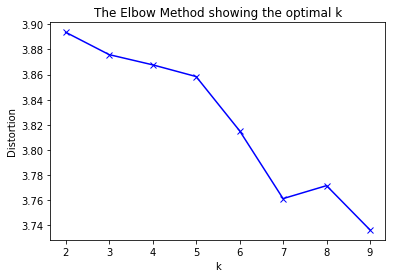

In [33]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,10):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  

plt.plot(range(2,10), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [65]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(x)

dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])


order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()


In [70]:
for i in range(7):
    #print("Cluster :" , i+1)
    listofwords = []
    for ind in order_centroids[i, :-1]:
        listofwords.append(terms[ind])
    #print(listofwords)
    totallist.append(listofwords)
    #print(totallist)
    #listofwordspercluster.append(listofwords)
    clusteritison.append(int(i+1))
    K.append(true_k)
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})  


In [71]:
DFclusters

,K_askedfor,clusternumber,listofwordspercluster
0,2,1,"[in, love, our, summer, style, heidiklein, dre..."
1,2,2,"[in, our, on, zeusndione, lisamariefernandez, ..."
2,3,1,"[dress, in, athenaprocopiou, to, summer, love,..."
3,3,2,"[in, our, love, summer, heidiklein, of, to, bi..."
4,3,3,"[to, we, of, in, our, is, this, so, all, you, ..."
5,4,1,"[to, in, of, for, you, is, our, this, we, that..."
6,4,2,"[dress, athenaprocopiou, in, love, summer, is,..."
7,4,3,"[in, our, love, summer, of, heidiklein, to, bi..."
8,4,4,"[we, to, have, our, of, this, with, would, mor..."
9,5,1,"[in, dress, to, summer, our, is, of, love, for..."


In [34]:
DFclusters.to_csv('clustersandwords_companies_kis7.csv', sep=',')

In [37]:
sevens = DFclusters[DFclusters.K_askedfor==7]

In [113]:
sevens.listofwordspercluster[23][0:40]

['in',
 'our',
 'to',
 'of',
 'is',
 'for',
 'on',
 'dress',
 'with',
 'zeusndione',
 'this',
 'you',
 'at',
 'we',
 'lmfgirlsonholiday',
 'by',
 'summer',
 'muzungusisters',
 'all',
 'new',
 'now',
 'from',
 'shop',
 'loupcharmant',
 'com',
 'it',
 'lesirenusepositanocollection',
 'lisamariefernandez',
 'are',
 'your',
 'ss17',
 'collection',
 'her',
 'beautiful',
 'bikini',
 'online',
 'silk',
 'available',
 'greece',
 'love']

In [40]:
for i,v in enumerate(sevens.listofwordspercluster):
    print("______________________________", i, "______________________________")
    print(v)

______________________________ 0 ______________________________
['to', 'we', 'of', 'in', 'our', 'is', 'this', 'so', 'all', 'you', 'for', 'have', 'many', 'with', 'love', 'them', 'us', 'girls', 'that', 'from', 'help', 'my', 'time', 'where', 'young', 'it', 'no', 'there', 'at', 'need', 'greece', 'each', 'last', 'any', 'dress', 'animals', 'about', 'sale', 'much', 'go', 'were', 'tanzania', 're', 'as', 'support', 'start', 'on', 'thank', 'cats', 'now', 'more', 'these', 'can', 'also', 'would', 'thanks', 'happy', 'by', 'end', 'find', 'how', 'care', 'day', 'people', 'month', 'had', 'may', 'personally', 'most', 'myself', 'feed', 'artisans', 'school', 'they', 'whether', 'work', 'when', 'muzungusisters', 'six', 'could', 'donkeys', 'very', 'first', 'distributing', 'years', 'up', 'few', 'pieces', 'right', 'every', 'know', 'through', 'awareness', 'kit', 'are', 'kits', 'wholesale', 'gypsy', 'swipe', 'grace', 'was', 'details', 'still', 'hair', 'women', 'which', 'want', 'nyc', 'one', 'special', 'athenapro

### using Karan's method

In [53]:
#Define Cluster Count
cluster_count = 2


#Implement K-Means Algortihm
model_kmeans = KMeans(n_clusters=cluster_count, random_state=9001)

#Fit Model and Predict
model_kmeans.fit(x)
y_pred = model_kmeans.predict(x)
DFall['Prediction'] = model_kmeans.labels_
display(DFall.head())

#df['Prediction'] = model_kmeans.labels_
#display(df.head())

ValueError: Length of values does not match length of index

In [ ]:
DFall['Prediction'] = np.zeros(len(DFall.caption))

In [ ]:

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
 
# clustering dataset
# determine k using elbow method
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 
    
 
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
 
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()
 
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
 
